In [1]:
import pandas as pd
from adtk.data import validate_series
from adtk.detector import LevelShiftAD, QuantileAD
from adtk.visualization import plot


level_shift_ad = LevelShiftAD(c=6.0, side='positive', window=5)

In [2]:
# Load your data
data = pd.read_csv('sensor_data.csv')
data['Time'] = pd.to_datetime(data['Time'], unit='s')  # Adjust unit based on your data's time unit
data.set_index('Time', inplace=True)
data = pd.Series(data['Channel B'])

C:\Users\Nyan Maw Htun\AppData\Roaming\Python\Python310\site-packages\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


[<Axes: >]

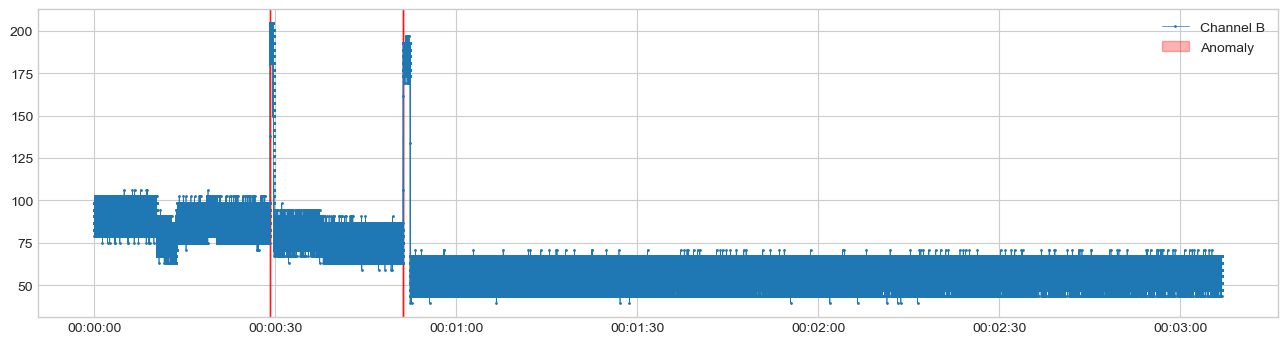

In [3]:
# Validate the time series format
data = validate_series(data)
anomalies = level_shift_ad.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color='red')

In [4]:
# Load your data
data2 = pd.read_csv('fluctuated_voltage_data.csv')
data2['Time'] = pd.to_datetime(data2['Time'], unit='s')  # Adjust unit based on your data's time unit
data2.set_index('Time', inplace=True)
data2 = pd.Series(data2['Channel B'])

In [5]:
data2 = validate_series(data2)
anomalies2 = level_shift_ad.fit_detect(data2)
plot(data2, anomaly=anomalies2, anomaly_color='red')

KeyboardInterrupt: 

In [ ]:
# Load your data
data3 = pd.read_csv('increased_voltage_data.csv')
data3['Time'] = pd.to_datetime(data3['Time'], unit='s')  # Adjust unit based on your data's time unit
data3.set_index('Time', inplace=True)
data3 = pd.Series(data3['Channel B'])

In [ ]:
data3 = validate_series(data3)
anomalies3 = level_shift_ad.fit_detect(data3)
plot(data3, anomaly=anomalies3, anomaly_color='red')

In [ ]:
class RealTimeLevelShiftAD:
    def __init__(self, window, c, side='both'):
        self.window = window
        self.c = c
        self.side = side
        self.reference_window = []
        self.current_window = []

    def update(self, new_value):
        # Update windows with new value
        if len(self.current_window) < self.window:
            self.current_window.append(new_value)
        else:
            self.reference_window = self.current_window
            self.current_window = [new_value]

        # Detect anomalies if windows are full
        if len(self.reference_window) == self.window:
            return self.detect()

    def detect(self):
        mean_ref = sum(self.reference_window) / len(self.reference_window)
        mean_cur = sum(self.current_window) / len(self.current_window)
        mean_diff = abs(mean_cur - mean_ref)

        # Calculate the threshold
        threshold = self.c * mean_diff  # Simplified threshold calculation

        # Check for anomalies
        if mean_diff > threshold:
            print(f"Anomaly detected: Current mean = {mean_cur}, Reference mean = {mean_ref}")
            return True
        return False


import pandas as pd
import time

def stream_data_from_csv(file_path, delay=0):
    """
    Simulates streaming data from a CSV file, yielding each row with an optional delay.
    
    :param file_path: Path to the CSV file.
    :param delay: Time delay between rows to simulate data streaming.
    """
    # Read the CSV file line by line
    for chunk in pd.read_csv(file_path, chunksize=1):
        yield chunk
        # time.sleep(delay)  # Simulate delay between data points

# Example usage
for data in stream_data_from_csv('sensor_data.csv'):
    print(data)
    # Here you would process your data, for example, feeding it to an anomaly detector

# Assuming RealTimeLevelShiftAD is already defined and instantiated
detector = RealTimeLevelShiftAD(window=10, c=3.0, side='both')

# Stream data and process only every 10,000 steps
step_counter = 0
for data in stream_data_from_csv('sensor_data.csv'):
    step_counter += 1  # Increment the counter for each piece of data processed
    if step_counter % 10000 == 0:  # Check if the current step is a multiple of 10,000
        channel_b_value = data['Channel B'].iloc[0]
        anomaly_detected = detector.update(channel_b_value)
        if anomaly_detected:
            print(f"Anomaly detected at step {step_counter}: {data['Time'].iloc[0]} with value {channel_b_value}")
            break



In [ ]:
level_shift_ad2 = LevelShiftAD(c=6.0, side='positive', window=100000)

In [ ]:
anomalies2 = level_shift_ad2.fit_detect(data)

In [ ]:
plot(data, anomaly=anomalies2, anomaly_color='red')